In [16]:
!pip install shap

In [17]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import missingno as mno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
import tensorflow as tf
import lightgbm as lgb
from tensorflow import keras
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
#DATA PREPROCESSING

In [19]:
df=pd.read_csv("training 4.csv")
df.head()

,age,bmi,elective_surgery,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,0,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.42,0,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.

In [20]:
df2=pd.read_csv("unlabeled.csv")
df2.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.1264,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating 

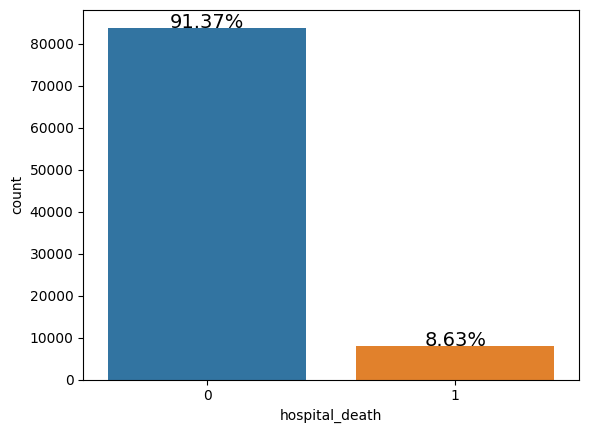

In [21]:
s = sns.countplot(x = 'hospital_death',data = df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=14)

In [22]:
df.describe()

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,16798.000000,88102.000000,88102.000000,84372.000000,84372.000000,69981.000000,69981.0000

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 182 entries, age to hospital_death
dtypes: float64(170), int64(5), object(7)
memory usage: 127.3+ MB


In [24]:
encounter_id=df2['encounter_id']
list(encounter_id)
len(encounter_id)

39308

In [25]:
# df.isnull().sum()

In [26]:
# mno.bar(df)

In [27]:
# mno.bar(df2)

In [28]:
# mno.matrix(df)
# mno.heatmap(df)

In [29]:
# mno.dendrogram(df)

In [30]:
# mno.matrix(df2)

In [31]:
cols=df.columns[df.isnull().any()]
missing_col=[]
len(cols)
for a in range(167):
  if((df[cols[a]].isnull().sum()/91713)*100 >=90):
    missing_col.append(cols[a])

In [32]:
missing_col

['h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_lactate_max',
 'h1_lactate_min']

In [33]:
h1_col=[]
d1_col=[]
for a in df:
  df[a] = df[a].fillna(value=np.nan)
  if(a[:2]=="h1"):h1_col.append(a)
  if(a[:2]=="d1"):d1_col.append(a)
type(df)

pandas.core.frame.DataFrame

In [34]:
print(h1_col)
print(len(h1_col))

['h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max

In [35]:
print(d1_col)
print(len(d1_col))

['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max

In [36]:
# drop_col=['icu_id','apache_4a_icu_death_prob','apache_4a_hospital_death_prob']+missing_col
drop_col=['icu_id','apache_4a_icu_death_prob','apache_4a_hospital_death_prob']
df.drop(columns=drop_col,axis=1,inplace=True)
# df.head()

In [37]:
drop_col2=drop_col+['encounter_id','patient_id','hospital_id','ethnicity','hospital_death']
df2.drop(columns=drop_col2,axis=1,inplace=True)
df2.head()

,age,bmi,elective_surgery,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,56.0,21.102439,0,M,180.3,Emergency Department,Accident & Emergency,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.1264,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,NaN,19.500595,1,F,145.0,Operating Room,Operating Room / Recovery,admit,Med-Surg ICU,0.230556,0,41.0,NaN,217.0,1502.02,1,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,4.0,NaN,60.0,NaN,0.0,53.0,NaN,NaN,NaN,NaN,37.0,NaN,37.0,843.4368,0.0,NaN,NaN,NaN,65.0,3

In [38]:
encode_col=["hospital_admit_source","icu_stay_type","icu_admit_source","icu_type","apache_3j_bodysystem","apache_2_bodysystem","gender"]
for a in encode_col:
  print(a)
  le=LabelEncoder()
  d1=le.fit_transform(df[a])
  df[a]=d1

hospital_admit_source
icu_stay_type
icu_admit_source
icu_type
apache_3j_bodysystem
apache_2_bodysystem
gender


In [39]:
for a in encode_col:
  print(a)
  le1=LabelEncoder()
  d1=le.fit_transform(df2[a])
  df2[a]=d1

hospital_admit_source
icu_stay_type
icu_admit_source
icu_type
apache_3j_bodysystem
apache_2_bodysystem
gender


<Axes: >

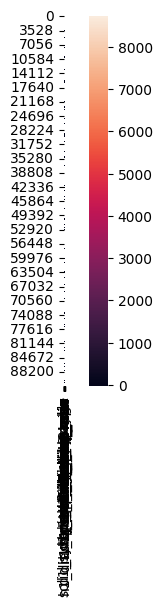

In [40]:
# sns.heatmap(df,square=True)

In [82]:
x=df.drop(["hospital_death"],axis=1)
y=df.hospital_death

In [83]:
params={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.9,
                    'num_leaves':70,
                    'max_depth': 15,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 100,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params1={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.9,
                    'num_leaves':70,
                    'max_depth': 15,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params2={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.8,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.8,
                    'num_leaves':70,
                    'max_depth': 14,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params3={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.9,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.9,
                    'num_leaves':70,
                    'max_depth': 14,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params4={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.9,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.75,
                    'num_leaves':70,
                    'max_depth': 14,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params5={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.8,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.85,
                    'num_leaves':50,
                    'max_depth': 14,
                    'lambda_l1': 0.9,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params6={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.8,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.8,
                    'num_leaves':80,
                    'max_depth': 10,
                    'lambda_l1': 1,
                    'lambda_l2': 0.8,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params7={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.8,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.8,
                    'num_leaves':40,
                    'max_depth': 14,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params8={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.8,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.8,
                    'num_leaves':60,
                    'max_depth': 15,
                    'lambda_l1': 1,
                    'lambda_l2': 1.2,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params9={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.9,
                    'num_leaves':60,
                    'max_depth': 15,
                    'lambda_l1': 1,
                    'lambda_l2': 1.1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params10={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.9,
                    'num_leaves':71,
                    'max_depth': 15,
                    'lambda_l1': 1,
                    'lambda_l2': 1.1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params11={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.9,
                    'num_leaves':70,
                    'max_depth': 15,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params12={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.9,
                    'num_leaves':70,
                    'max_depth': 15,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params13={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.8,
                    'subsample_freq': 1,
                    'learning_rate': 0.01,
                    'feature_fraction': 0.8,
                    'num_leaves':70,
                    'max_depth': 15,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params14={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.05,
                    'feature_fraction': 0.9,
                    'num_leaves':71,
                    'max_depth': 20,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }
params15={'n_estimators':2000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.9,
                    'subsample_freq': 1,
                    'learning_rate': 0.05,
                    'feature_fraction': 0.9,
                    'num_leaves':61,
                    'max_depth': 10,
                    'lambda_l1': 1,
                    'lambda_l2': 1,
                    'early_stopping_rounds': 120,
                    'scale_pos_weight' : 3,
                    'verbose':0
                    }

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,shuffle=True)

In [103]:
mm=MinMaxScaler(feature_range=(0,1))
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

x_valid=df2.to_numpy()
x_valid=mm.transform(x_valid)
# x_valid

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [93]:
# splitting unlabeled data for pseudo labeling
# x_valid1,x_valid2=train_test_split(x_valid,test_size=0.1,shuffle=True)

In [94]:
# skf=StratifiedKFold(n_splits=4,shuffle=True)
# y_valid=[]
# y_valid1=[]
# y_valid2=[]
# y_valid3=[]
# y_valid4=[]
# y_valid5=[]
# y_valid6=[]
# y_valid7=[]
# y_valid8=[]
# y_valid9=[]
# max=0
# max1=0
# max2=0
# max3=0
# max4=0
# max5=0
# max6=0
# max7=0
# max8=0
# max9=0

In [47]:
# for train_index,test_index in skf.split(x,y):
#   x_train,x_test=x_scaled[train_index],x_scaled[test_index]
#   y_train,y_test=y[train_index],y[test_index]
#   train_data = lgb.Dataset(x_train, label=y_train)
#   valid_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
#   train_data = lgb.Dataset(x_train, label=y_train)
#   valid_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
#   lgbm=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm1=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm2=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm3=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm4=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm5=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm6=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm7=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm8=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   lgbm9=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   # lgbm=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])
#   y_pred= list(lgbm.predict(x_test))
#   y_pred1=list(lgbm1.predict(x_test))
#   y_pred2=list(lgbm2.predict(x_test))
#   y_pred3=list(lgbm3.predict(x_test))
#   y_pred4=list(lgbm4.predict(x_test))
#   y_pred5=list(lgbm5.predict(x_test))
#   y_pred6=list(lgbm6.predict(x_test))
#   y_pred7=list(lgbm7.predict(x_test))
#   y_pred8=list(lgbm8.predict(x_test))
#   y_pred9=list(lgbm9.predict(x_test))
#   if(roc_auc_score(y_test,y_pred)>max):  y_valid=list(lgbm.predict(x_valid));max=roc_auc_score(y_test,y_pred);
#   if(roc_auc_score(y_test,y_pred1)>max1):y_valid1=list(lgbm.predict(x_valid));max1=roc_auc_score(y_test,y_pred1);
#   if(roc_auc_score(y_test,y_pred2)>max2):y_valid2=list(lgbm.predict(x_valid));max2=roc_auc_score(y_test,y_pred2);
#   if(roc_auc_score(y_test,y_pred3)>max3):y_valid3=list(lgbm.predict(x_valid));max3=roc_auc_score(y_test,y_pred3);
#   if(roc_auc_score(y_test,y_pred4)>max4):y_valid4=list(lgbm.predict(x_valid));max4=roc_auc_score(y_test,y_pred4);
#   if(roc_auc_score(y_test,y_pred5)>max5):y_valid5=list(lgbm.predict(x_valid));max5=roc_auc_score(y_test,y_pred5);
#   if(roc_auc_score(y_test,y_pred6)>max6):y_valid6=list(lgbm.predict(x_valid));max6=roc_auc_score(y_test,y_pred6);
#   if(roc_auc_score(y_test,y_pred7)>max7):y_valid7=list(lgbm.predict(x_valid));max7=roc_auc_score(y_test,y_pred7);
#   if(roc_auc_score(y_test,y_pred8)>max8):y_valid8=list(lgbm.predict(x_valid));max8=roc_auc_score(y_test,y_pred8);
#   if(roc_auc_score(y_test,y_pred9)>max9):y_valid9=list(lgbm.predict(x_valid));max9=roc_auc_score(y_test,y_pred9);


In [95]:
# train_data = lgb.Dataset(x_train, label=y_train)
# valid_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

In [49]:
# print(len(x_train))
# print(len(y_train))
# print(len(x_valid2))

In [96]:
# model for predicting valus of unlabeled data
# lgbm=lgb.train(params,train_data,valid_sets=[valid_data],valid_names=['valid'])

In [51]:
# y_pred=lgbm.predict(x_valid2)
# y_pred=y_pred>0.5

In [52]:
# len(y_pred)

In [53]:
# adding pseudo labeling to original training set
# x_train=np.concatenate((x_train,x_valid2),axis=0)
# y_train=np.concatenate((y_train,y_pred),axis=0)
# len(x_train)
# len(y_train)

In [104]:
train_data = lgb.Dataset(x_train, label=y_train)
valid_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

In [105]:
lgbm1=lgb.train(params1,train_data,valid_sets=[valid_data],valid_names=['valid'])

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid's auc: 0.850663
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.859432
[3]	valid's auc: 0.864692
[4]	valid's auc: 0.866781
[5]	valid's auc: 0.874287
[6]	valid's auc: 0.876959
[7]	valid's auc: 0.878567
[8]	valid's auc: 0.879724
[9]	valid's auc: 0.880024
[10]	valid's auc: 0.880415
[11]	valid's auc: 0.881721
[12]	valid's auc: 0.882301
[13]	valid's auc: 0.882171
[14]	valid's auc: 0.882162
[15]	valid's auc: 0.883089
[16]	valid's auc: 0.883421
[17]	valid's auc: 0.883662
[18]	valid's auc: 0.883794
[19]	valid's auc: 0.883806
[20]	valid's auc: 0.884723
[21]	valid's auc: 0.885221
[22]	valid's auc: 0.885947
[23]	valid's auc: 0.886355
[24]	valid's auc: 0.886881
[25]	valid's auc: 0.886824
[26]	valid's auc: 0.886828
[27]	valid's auc

In [106]:
lgbm2=lgb.train(params2,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid's auc: 0.84187
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.861239
[3]	valid's auc: 0.863423
[4]	valid's auc: 0.86556
[5]	valid's auc: 0.869168
[6]	valid's auc: 0.874556
[7]	valid's auc: 0.876112
[8]	valid's auc: 0.877429
[9]	valid's auc: 0.878896
[10]	valid's auc: 0.880437
[11]	valid's auc: 0.88157
[12]	valid's auc: 0.881948
[13]	valid's auc: 0.881793
[14]	valid's auc: 0.881566
[15]	valid's auc: 0.882238
[16]	valid's auc: 0.882513
[17]	valid's auc: 0.883448
[18]	valid's auc: 0.883758
[19]	valid's auc: 0.883957
[20]	valid's auc: 0.884094
[21]	valid's auc: 0.884791
[22]	valid's auc: 0.885512
[23]	valid's auc: 0.885723
[24]	valid's auc: 0.885932
[25]	valid's auc: 0.886129
[26]	valid's auc: 0.885882
[27]	valid's auc: 0

In [107]:
lgbm3=lgb.train(params3,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid's auc: 0.846894
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.857341
[3]	valid's auc: 0.859906
[4]	valid's auc: 0.862261
[5]	valid's auc: 0.872119
[6]	valid's auc: 0.876612
[7]	valid's auc: 0.87774
[8]	valid's auc: 0.878643
[9]	valid's auc: 0.87889
[10]	valid's auc: 0.879845
[11]	valid's auc: 0.881048
[12]	valid's auc: 0.880948
[13]	valid's auc: 0.880938
[14]	valid's auc: 0.880784
[15]	valid's auc: 0.881322
[16]	valid's auc: 0.881409
[17]	valid's auc: 0.882631
[18]	valid's auc: 0.88227
[19]	valid's auc: 0.882329
[20]	valid's auc: 0.882374
[21]	valid's auc: 0.882629
[22]	valid's auc: 0.882847
[23]	valid's auc: 0.883256
[24]	valid's auc: 0.883834
[25]	valid's auc: 0.884479
[26]	valid's auc: 0.884379
[27]	valid's auc: 0

In [108]:
lgbm4=lgb.train(params4,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.228412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid's auc: 0.844722
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.85956
[3]	valid's auc: 0.860618
[4]	valid's auc: 0.864686
[5]	valid's auc: 0.873939
[6]	valid's auc: 0.877751
[7]	valid's auc: 0.878982
[8]	valid's auc: 0.88003
[9]	valid's auc: 0.880448
[10]	valid's auc: 0.880887
[11]	valid's auc: 0.881591
[12]	valid's auc: 0.881341
[13]	valid's auc: 0.882083
[14]	valid's auc: 0.882275
[15]	valid's auc: 0.882412
[16]	valid's auc: 0.882416
[17]	valid's auc: 0.88347
[18]	valid's auc: 0.883379
[19]	valid's auc: 0.883345
[20]	valid's auc: 0.883385
[21]	valid's auc: 0.883451
[22]	valid's auc: 0.883868
[23]	valid's auc: 0.883931
[24]	valid's auc: 0.884089
[25]	valid's auc: 0.88464
[26]	valid's auc: 0.884677
[27]	valid's auc: 0.884918
[28]	valid's auc: 0.885099
[29]	valid's auc: 0.885604
[30

In [109]:
lgbm5=lgb.train(params5,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid's auc: 0.842079
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.861763
[3]	valid's auc: 0.863164
[4]	valid's auc: 0.862578
[5]	valid's auc: 0.86426
[6]	valid's auc: 0.869461
[7]	valid's auc: 0.872924
[8]	valid's auc: 0.874813
[9]	valid's auc: 0.875484
[10]	valid's auc: 0.876828
[11]	valid's auc: 0.878123
[12]	valid's auc: 0.87865
[13]	valid's auc: 0.878629
[14]	valid's auc: 0.878522
[15]	valid's auc: 0.879161
[16]	valid's auc: 0.879388
[17]	valid's auc: 0.880663
[18]	valid's auc: 0.880739
[19]	valid's auc: 0.881221
[20]	valid's auc: 0.881772
[21]	valid's auc: 0.881897
[22]	valid's auc: 0.882202
[23]	valid's auc: 0.882314
[24]	valid's auc: 0.882644
[25]	valid's auc: 0.882576
[26]	valid's auc: 0.88285
[27]	valid's auc: 0

In [110]:
lgbm6=lgb.train(params6,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid's auc: 0.844464
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.863479
[3]	valid's auc: 0.865627
[4]	valid's auc: 0.867453
[5]	valid's auc: 0.870659
[6]	valid's auc: 0.875843
[7]	valid's auc: 0.877858
[8]	valid's auc: 0.878922
[9]	valid's auc: 0.880462
[10]	valid's auc: 0.882165
[11]	valid's auc: 0.883111
[12]	valid's auc: 0.882934
[13]	valid's auc: 0.882885
[14]	valid's auc: 0.882995
[15]	valid's auc: 0.883764
[16]	valid's auc: 0.883818
[17]	valid's auc: 0.883825
[18]	valid's auc: 0.884468
[19]	valid's auc: 0.884525
[20]	valid's auc: 0.884642
[21]	valid's auc: 0.886043
[22]	valid's auc: 0.886689
[23]	valid's auc: 0.886852
[24]	valid's auc: 0.887161
[25]	valid's auc: 0.887594
[26]	valid's auc: 0.887383
[27]	valid's auc

In [111]:
lgbm7=lgb.train(params7,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.232965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid's auc: 0.839223
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.859714
[3]	valid's auc: 0.859935
[4]	valid's auc: 0.859416
[5]	valid's auc: 0.864067
[6]	valid's auc: 0.869646
[7]	valid's auc: 0.87122
[8]	valid's auc: 0.872225
[9]	valid's auc: 0.872395
[10]	valid's auc: 0.873853
[11]	valid's auc: 0.874606
[12]	valid's auc: 0.875576
[13]	valid's auc: 0.875449
[14]	valid's auc: 0.875363
[15]	valid's auc: 0.875787
[16]	valid's auc: 0.876295
[17]	valid's auc: 0.876679
[18]	valid's auc: 0.877129
[19]	valid's auc: 0.877534
[20]	valid's auc: 0.877733
[21]	valid's auc: 0.87754
[22]	valid's auc: 0.878215
[23]	valid's auc: 0.878561
[24]	valid's auc: 0.87889
[25]	valid's auc: 0.879098
[26]	valid's auc: 0.87959
[27]	valid's auc: 0.880102
[28]	valid's auc: 0.880241
[29]	valid's auc: 0.880645
[30

In [112]:
lgbm8=lgb.train(params8,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.232830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid's auc: 0.838393
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.861135
[3]	valid's auc: 0.86317
[4]	valid's auc: 0.864313
[5]	valid's auc: 0.868342
[6]	valid's auc: 0.873543
[7]	valid's auc: 0.875201
[8]	valid's auc: 0.876803
[9]	valid's auc: 0.877267
[10]	valid's auc: 0.878549
[11]	valid's auc: 0.879414
[12]	valid's auc: 0.88013
[13]	valid's auc: 0.879604
[14]	valid's auc: 0.879592
[15]	valid's auc: 0.880158
[16]	valid's auc: 0.880474
[17]	valid's auc: 0.881317
[18]	valid's auc: 0.881651
[19]	valid's auc: 0.881792
[20]	valid's auc: 0.881977
[21]	valid's auc: 0.882998
[22]	valid's auc: 0.883673
[23]	valid's auc: 0.883963
[24]	valid's auc: 0.884187
[25]	valid's auc: 0.884217
[26]	valid's auc: 0.884416
[27]	valid's auc: 0.8847
[28]	valid's auc: 0.884846
[29]	valid's auc: 0.884815
[30

In [113]:
lgbm9=lgb.train(params9,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid's auc: 0.851876
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.860211
[3]	valid's auc: 0.86455
[4]	valid's auc: 0.865767
[5]	valid's auc: 0.873521
[6]	valid's auc: 0.875571
[7]	valid's auc: 0.877937
[8]	valid's auc: 0.87863
[9]	valid's auc: 0.879261
[10]	valid's auc: 0.880074
[11]	valid's auc: 0.881183
[12]	valid's auc: 0.881976
[13]	valid's auc: 0.881562
[14]	valid's auc: 0.881538
[15]	valid's auc: 0.882834
[16]	valid's auc: 0.882773
[17]	valid's auc: 0.882778
[18]	valid's auc: 0.882815
[19]	valid's auc: 0.883011
[20]	valid's auc: 0.883831
[21]	valid's auc: 0.884213
[22]	valid's auc: 0.884809
[23]	valid's auc: 0.885278
[24]	valid's auc: 0.885818
[25]	valid's auc: 0.885687
[26]	valid's auc: 0.885722
[27]	valid's auc: 

In [114]:
lgbm10=lgb.train(params10,train_data,valid_sets=[valid_data],valid_names=['valid'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid's auc: 0.850225
Training until validation scores don't improve for 120 rounds
[2]	valid's auc: 0.859689
[3]	valid's auc: 0.864859
[4]	valid's auc: 0.865974
[5]	valid's auc: 0.874156
[6]	valid's auc: 0.875851
[7]	valid's auc: 0.878085
[8]	valid's auc: 0.878993
[9]	valid's auc: 0.879316
[10]	valid's auc: 0.88032
[11]	valid's auc: 0.882099
[12]	valid's auc: 0.882719
[13]	valid's auc: 0.88252
[14]	valid's auc: 0.882245
[15]	valid's auc: 0.883339
[16]	valid's auc: 0.883401
[17]	valid's auc: 0.883852
[18]	valid's auc: 0.883868
[19]	valid's auc: 0.883986
[20]	valid's auc: 0.884955
[21]	valid's auc: 0.885418
[22]	valid's auc: 0.886152
[23]	valid's auc: 0.886568
[24]	valid's auc: 0.887004
[25]	valid's auc: 0.887005
[26]	valid's auc: 0.886925
[27]	valid's auc: 

In [65]:
# lgbm11=lgb.train(params11,train_data,valid_sets=[valid_data],valid_names=['valid'])

In [66]:
# lgbm12=lgb.train(params12,train_data,valid_sets=[valid_data],valid_names=['valid'])

In [67]:
# lgbm13=lgb.train(params13,train_data,valid_sets=[valid_data],valid_names=['valid'])

In [68]:
# lgbm14=lgb.train(params14,train_data,valid_sets=[valid_data],valid_names=['valid'])

In [69]:
# lgbm15=lgb.train(params15,train_data,valid_sets=[valid_data],valid_names=['valid'])

In [115]:
# y_pred=lgbm.predict(x_test)
y_pred1=lgbm1.predict(x_test)
y_pred2=lgbm2.predict(x_test)
y_pred3=lgbm3.predict(x_test)
y_pred4=lgbm4.predict(x_test)
y_pred5=lgbm5.predict(x_test)
y_pred6=lgbm6.predict(x_test)
y_pred7=lgbm7.predict(x_test)
y_pred8=lgbm8.predict(x_test)
y_pred9=lgbm9.predict(x_test)
y_pred10=lgbm10.predict(x_test)
# y_pred11=lgbm11.predict(x_test)
# y_pred12=lgbm12.predict(x_test)
# y_pred13=lgbm13.predict(x_test)
# y_pred14=lgbm14.predict(x_test)
# y_pred15=lgbm15.predict(x_test)
for a in range (len(y_pred1)):
  y_pred1[a]=(y_pred1[a]+y_pred2[a]+y_pred3[a]+y_pred4[a]+y_pred5[a]+y_pred6[a]+y_pred7[a]+y_pred8[a]+y_pred9[a]+y_pred10[a])/10
  # y_pred1[a]=(y_pred1[a]+y_pred2[a]+y_pred3[a]+y_pred4[a]+y_pred5[a]+y_pred6[a]+y_pred7[a]+y_pred8[a]+y_pred9[a]+y_pred10[a]+y_pred11[a]+y_pred12[a]+y_pred13[a]+y_pred14[a]+y_pred15[a])/15


In [116]:
y_pred_c=y_pred1>0.5
# print(y_pred)
print(confusion_matrix(y_test,y_pred_c))
print(classification_report(y_test,y_pred_c))
print(roc_auc_score(y_test,y_pred1))
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)
# print(fpr)
# print(tpr)
# print("Regression AUC 1",roc_auc_score(y_test,y_pred))
# print("Regression AUC 2",roc_auc_score(y_test,y_pred1))
# print("Regression AUC 3",roc_auc_score(y_test,y_pred2))
# print("Regression AUC 4",roc_auc_score(y_test,y_pred3))
# print("Regression AUC 5",roc_auc_score(y_test,y_pred4))
# print("Regression AUC 6",roc_auc_score(y_test,y_pred5))
# print("Regression AUC 7",roc_auc_score(y_test,y_pred6))
# print("Regression AUC 8",roc_auc_score(y_test,y_pred7))
# print("Regression AUC 9",roc_auc_score(y_test,y_pred8))
# print("Regression AUC 10",roc_auc_score(y_test,y_pred9))

[[8053  327]
 [ 333  459]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8380
           1       0.58      0.58      0.58       792

    accuracy                           0.93      9172
   macro avg       0.77      0.77      0.77      9172
weighted avg       0.93      0.93      0.93      9172

0.9148882922301776


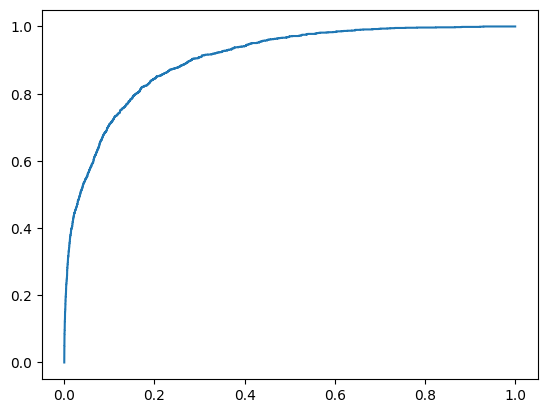

In [72]:
plt.plot(fpr,tpr)

In [73]:
y_valid10=list(lgbm10.predict(x_valid))
y_valid1=list(lgbm1.predict(x_valid))
y_valid2=list(lgbm2.predict(x_valid))
y_valid3=list(lgbm3.predict(x_valid))
y_valid4=list(lgbm4.predict(x_valid))
y_valid5=list(lgbm5.predict(x_valid))
y_valid6=list(lgbm6.predict(x_valid))
y_valid7=list(lgbm7.predict(x_valid))
y_valid8=list(lgbm8.predict(x_valid))
y_valid9=list(lgbm9.predict(x_valid))
# y_valid11=list(lgbm11.predict(x_valid))
# y_valid12=list(lgbm12.predict(x_valid))
# y_valid13=list(lgbm13.predict(x_valid))
# y_valid14=list(lgbm14.predict(x_valid))
# y_valid15=list(lgbm15.predict(x_valid))

In [118]:
for a in range(len(y_valid10)):
  y_valid1[a]=(y_valid1[a]+y_valid2[a]+y_valid3[a]+y_valid4[a]+y_valid5[a]+y_valid6[a]+y_valid7[a]+y_valid8[a]+y_valid9[a]+y_valid10[a])/15
  # y_valid1[a]=(y_valid1[a]+y_valid2[a]+y_valid3[a]+y_valid4[a]+y_valid5[a]+y_valid6[a]+y_valid7[a]+y_valid8[a]+y_valid9[a]+y_valid10[a]+y_valid11[a]+y_valid12[a]+y_valid13[a]+y_valid14[a]+y_valid15[a])/15

soln=[]
soln.extend([list(a) for a in zip(encounter_id,y_valid1)])

In [1]:
import shap
# shap.initjs()
explainer = shap.TreeExplainer(lgbm1)
shap_values = explainer.shap_values(x_train)

# visualize the training set predictions
# SHAP plots for all the data is very slow, so we'll only do it for a sample. Taking the head instead of a random sample is dangerous!
shap.plots.beeswarm(shap_values[])
# shap.force_plot(explainer.expected_value,shap_values[0,:100], x_train.iloc[0,:100])

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


NameError: ignored

In [119]:
import csv
filename="solnlgbm11.csv"
with open(filename,'w') as csvfile:
  csvwriter=csv.writer(csvfile)
  csvwriter.writerow(['encounter_id','hospital_death'])
  csvwriter.writerows(soln)

csvfile.close()